In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#carregar os dados
data = pd.read_csv('fort_283_2008_2022.txt', delimiter='\t', header=None)

In [3]:
print(data)

                 0      1      2
0       18/04/2008  02:00  7.188
1       18/04/2008  03:00  7.409
2       18/04/2008  04:00  7.351
3       18/04/2008  05:00  7.033
4       18/04/2008  06:00  6.538
...            ...    ...    ...
128897  31/12/2022  19:00  5.709
128898  31/12/2022  20:00  5.941
128899  31/12/2022  21:00  6.277
128900  31/12/2022  22:00  6.597
128901  31/12/2022  23:00  6.900

[128902 rows x 3 columns]


In [4]:
# Renomear as colunas
data.columns = ['dt', 'hr', 'alt']

In [5]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['Data1'] = pd.to_datetime(data['dt'] + ' ' + data['hr'], format='%d/%m/%Y %H:%M')

In [6]:
datum = 5.850 
data['altura'] = data['alt'] - datum 
data['altura'] = data['altura'] * 100

In [7]:
#converter a coluna Data1 para o formato datetime
data['Data1'] = pd.to_datetime(data['Data1'])

In [8]:
# Construir a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(data)), data['Data1'].apply(lambda x: x.to_julian_date())])
X0 = np.linalg.lstsq(A0, data['altura'], rcond=None)[0]
tendencia = A0.dot(X0)

In [9]:
# Converter a coluna 'data_hora' para o índice do DataFrame, se ainda não estiver
data.set_index('Data1', inplace=True)

# Calcular a média mensal da coluna 'alt_zero' corresponde a altura após a subtração da 
media_mensal = data['altura'].resample('M').mean()

# Exibir a média mensal
print(media_mensal)

Data1
2008-04-30    46.510645
2008-05-31    46.529839
2008-06-30    44.322778
2008-07-31    45.804435
2008-08-31    47.113978
                ...    
2022-08-31    52.508065
2022-09-30    52.693472
2022-10-31    52.459677
2022-11-30    53.573333
2022-12-31    49.954167
Freq: ME, Name: altura, Length: 177, dtype: float64


C:\Users\labdi\AppData\Local\Temp\ipykernel_10700\3154758801.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = data['altura'].resample('M').mean()


In [10]:
# Cria um novo DataFrame com as médias mensais de'data_hora' e alt_zero

data1 = pd.DataFrame({
    'Data1': media_mensal.index,
    'altura': media_mensal.values
})

# Exibe o novo DataFrame com as médias mensais
print(data1)

         Data1     altura
0   2008-04-30  46.510645
1   2008-05-31  46.529839
2   2008-06-30  44.322778
3   2008-07-31  45.804435
4   2008-08-31  47.113978
..         ...        ...
172 2022-08-31  52.508065
173 2022-09-30  52.693472
174 2022-10-31  52.459677
175 2022-11-30  53.573333
176 2022-12-31  49.954167

[177 rows x 2 columns]


In [11]:
# Construindo a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(data1)), data1['Data1'].apply(lambda x: x.to_julian_date())])
#x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
x0 = np.linalg.lstsq(A0, data1['altura'], rcond=None)[0]
tendencia = A0.dot(x0) #tendencia estimada

In [13]:
import pandas as pd
from scipy.stats import linregress

# Convertendo a coluna de data_hora para o ano
data1['ano'] = data1['Data1'].dt.year

# Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(data1['ano'], data1['altura'])

# Tendência por ano (inclinação da reta)
tendencia_por_ano = slope

# Grau de incerteza
incerteza = std_err


print("Tendência por ano:", tendencia_por_ano)
print("Incerteza:", incerteza)

Tendência por ano: 0.24083197825707645
Incerteza: 0.030135245377871496


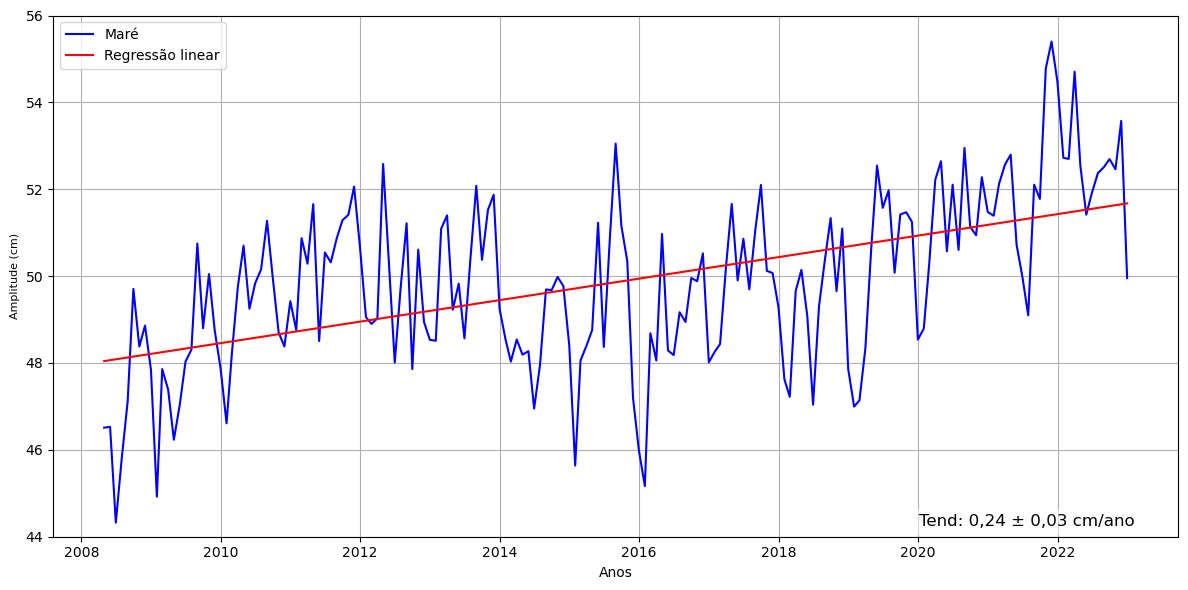

In [20]:
# Importe a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Resolução desejada
dpi = 300
Trend = '0,24 ± 0,03'  # Defina o valor da tendência

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(data1['Data1'], data1['altura'], 'b', label='Maré')
#plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], linestyle='--', color='b', label='Maré')  # Corrigido aqui
#plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear', 'lineWidth', 1.5)
plt.plot(data1['Data1'], tendencia, 'r', label='Regressão linear', linewidth=1.5)


# Adicione o valor da tendência linear abaixo da legenda
plt.text(0.77, 0.02, f'Tend: {Trend} cm/ano', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='w', edgecolor='none', alpha=0.5))

#plt.title('Nível médio anual mar em Fortaleza', fontsize=12)
plt.legend(loc='upper left')
plt.xlabel('Anos')
plt.ylabel('Amplitude (cm)', fontsize=8)
plt.grid(True)
# Define os limites e os marcadores dos eixos y
plt.ylim(44 , 56)
plt.yticks(range(44, 57, 2))
# Define o formato do eixo x para mostrar anos e meses (AAAA, MM)
# Salvar a figura
#plt.savefig('D:/graficos/Tendencia/nivel_medio_anual_fortaleza_semtitiutlo.png', dpi=dpi)  # Salva a figura com a resolução especificada


plt.tight_layout()
plt.show()

In [23]:
data1.to_csv('D:/Sazonalidade/dataframe_sazonalidades/tend_Fortaleza.csv', index=False)

In [22]:
import numpy as np

# Calcule o desvio padrão da série de dados 'alt_zero'
desvio = np.std(data1['altura'])

# Exiba o desvio padrão
print("Desvio padrão:", desvio)

Desvio padrão: 1.9835967939052326


In [13]:
#calcular a média movel de 12 periodos
#data['Media_movel_12'] = data['altura'].rolling(window=12).mean()
# Calcular a média móvel de 12 períodos com janelas centradas
data1['Media_Movel_12'] = data1['altura'].rolling(window=12, center=True).sum()

In [14]:
print(data1.head(10))

       Data1    altura  Media_Movel_12
0 2008-04-30  0.465106             NaN
1 2008-05-31  0.465298             NaN
2 2008-06-30  0.443228             NaN
3 2008-07-31  0.458044             NaN
4 2008-08-31  0.471140             NaN
5 2008-09-30  0.497061             NaN
6 2008-10-31  0.483782        5.652409
7 2008-11-30  0.488614        5.649630
8 2008-12-31  0.478427        5.654736
9 2009-01-31  0.449230        5.691843


In [15]:
# Plotar as alturas originais
#plt.plot(data['altura'], label='Altura Original')

# Plotar a média móvel de período 12
#plt.plot(data['Media_Movel_12'], label='Média Móvel de 12 Períodos')
#plt.plot(tendencia, 'k', label='Regressão linear')

# Adicionar rótulos e legendas
#plt.xlabel('Meses')
#plt.ylabel('Amplitudes')
#plt.title('Altura e Médias Móveis')
#plt.legend()

# Mostrar o gráfico
#plt.show()


In [16]:
# Calcular a média móvel centrada de 2 períodos
#data['Media_Movel_2_Centrada'] = data['Media_Movel_12'].rolling(window=2, center=True).mean()
# Calcular a média móvel centrada de 2 períodos a partir da média móvel de 12 períodos
data1['Media_Movel_2_Centrada'] = data1['Media_Movel_12'].rolling(window=2, center=True).sum()

#data['Media_Movel_2_Centrada'] = data['Media_Movel_12'].rolling(window=2, center=True).sum(min_periods=1)
#data['Media_Movel_2_Centrada'] = data['Media_Movel_12'].rolling(window=2, center=True).mean()



In [17]:
print(data1.head(10))

       Data1    altura  Media_Movel_12  Media_Movel_2_Centrada
0 2008-04-30  0.465106             NaN                     NaN
1 2008-05-31  0.465298             NaN                     NaN
2 2008-06-30  0.443228             NaN                     NaN
3 2008-07-31  0.458044             NaN                     NaN
4 2008-08-31  0.471140             NaN                     NaN
5 2008-09-30  0.497061             NaN                     NaN
6 2008-10-31  0.483782        5.652409                     NaN
7 2008-11-30  0.488614        5.649630               11.302039
8 2008-12-31  0.478427        5.654736               11.304367
9 2009-01-31  0.449230        5.691843               11.346580


In [18]:
# Calculando a média móvel centrada de período 2
#data['Media_Movel_2'] = data['Altura'].rolling(window=2, center=True).mean()

# Calculando a média móvel centrada dividida por 24
data1['Media_Movel_Centrada'] = data1['Media_Movel_2_Centrada'] / 24

In [19]:
print(data1.head(20))

        Data1    altura  Media_Movel_12  Media_Movel_2_Centrada  \
0  2008-04-30  0.465106             NaN                     NaN   
1  2008-05-31  0.465298             NaN                     NaN   
2  2008-06-30  0.443228             NaN                     NaN   
3  2008-07-31  0.458044             NaN                     NaN   
4  2008-08-31  0.471140             NaN                     NaN   
5  2008-09-30  0.497061             NaN                     NaN   
6  2008-10-31  0.483782        5.652409                     NaN   
7  2008-11-30  0.488614        5.649630               11.302039   
8  2008-12-31  0.478427        5.654736               11.304367   
9  2009-01-31  0.449230        5.691843               11.346580   
10 2009-02-28  0.478588        5.716877               11.408720   
11 2009-03-31  0.473890        5.753230               11.470107   
12 2009-04-30  0.462328        5.744168               11.497398   
13 2009-05-31  0.470405        5.760849               11.50501

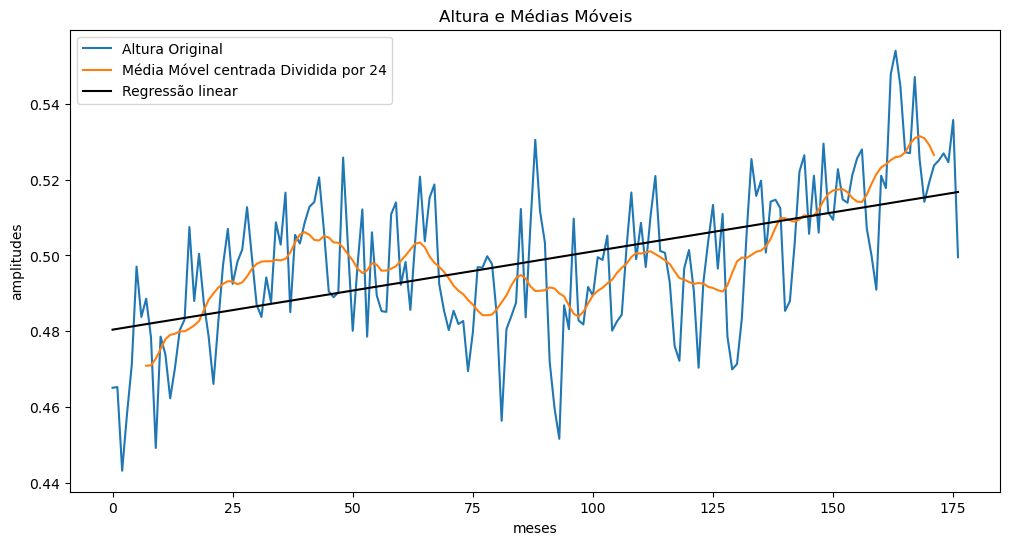

In [20]:
# Plotar as alturas originais
plt.figure(figsize =(12, 6))
plt.plot(data1['altura'], label='Altura Original')

# Plotar a média móvel de período 12
#plt.plot(data['Media_Movel_12'], label='Média Móvel de 12 Períodos')

# Plotar a média móvel centrada dividida por 24
#plt.plot(data['Media_Movel_2_Centrada'], label='Média Móvel 2 Centrada ')

plt.plot(data1['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [32]:
# Calcular os índices sazonais subtraindo a média móvel centrada da altura original
data1['indices_sazonais'] = data1['altura'] - data1['Media_Movel_Centrada']

In [33]:
print(data1.head(20))

        Data1    altura  Media_Movel_12  Media_Movel_2_Centrada  \
0  2008-04-30  0.465106             NaN                     NaN   
1  2008-05-31  0.465298             NaN                     NaN   
2  2008-06-30  0.443228             NaN                     NaN   
3  2008-07-31  0.458044             NaN                     NaN   
4  2008-08-31  0.471140             NaN                     NaN   
5  2008-09-30  0.497061             NaN                     NaN   
6  2008-10-31  0.483782        5.652409                     NaN   
7  2008-11-30  0.488614        5.649630               11.302039   
8  2008-12-31  0.478427        5.654736               11.304367   
9  2009-01-31  0.449230        5.691843               11.346580   
10 2009-02-28  0.478588        5.716877               11.408720   
11 2009-03-31  0.473890        5.753230               11.470107   
12 2009-04-30  0.462328        5.744168               11.497398   
13 2009-05-31  0.470405        5.760849               11.50501

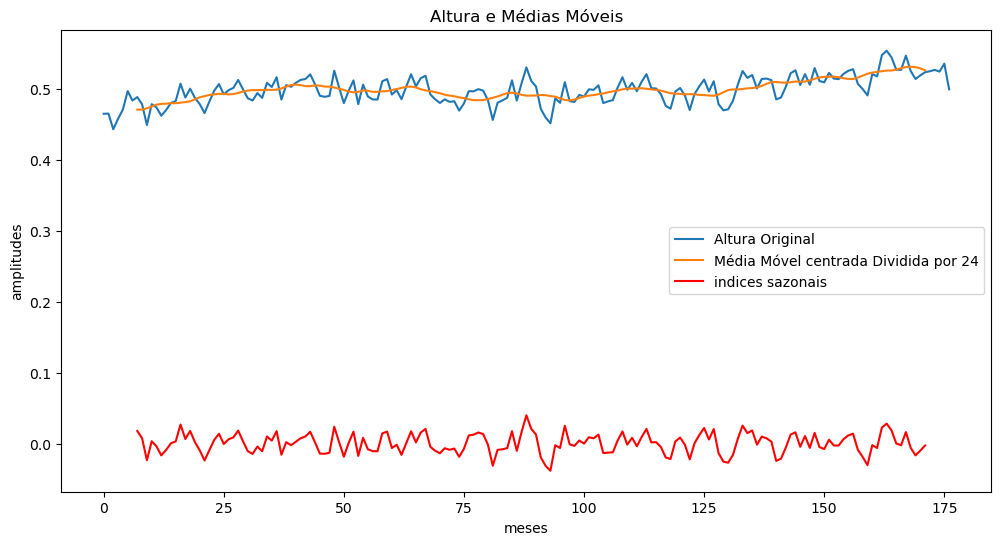

In [34]:
# Plotar as alturas originais
plt.figure(figsize=(12, 6))
# Plotar as alturas originais
plt.plot(data1['altura'], label='Altura Original')


plt.plot(data1['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
#plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas

plt.plot(data1['indices_sazonais'], 'r', label='indices sazonais')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [35]:
#filtrar os dados para cada mês toda serie temporal
mensal01 = data1['Data1'].dt.month

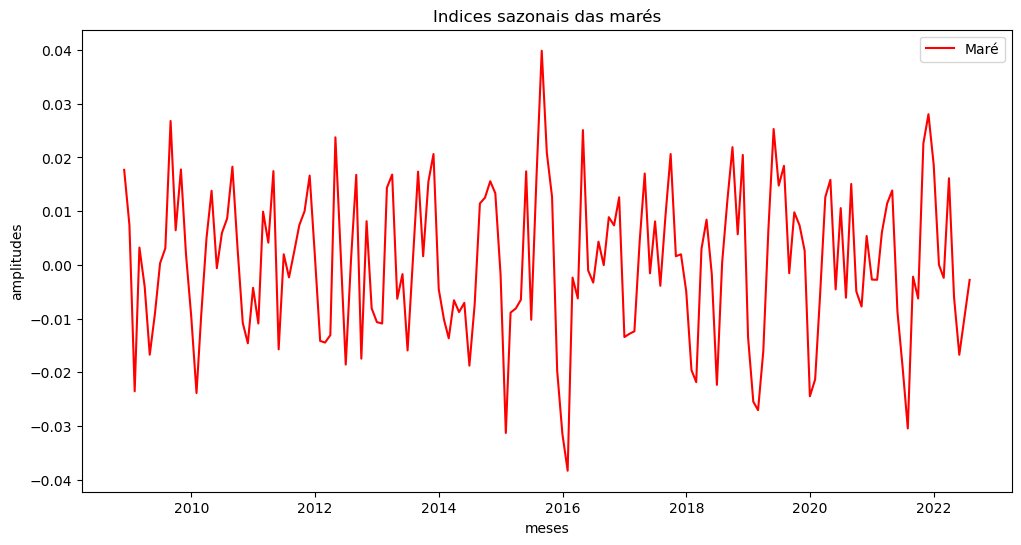

In [36]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(data1['Data1'], data1['indices_sazonais'], 'r', label='Maré')
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [37]:
#liste de nomes dos meses 
meses = ['jan', 'fev', 'mar', 
        'abr', 'maio', 'jun',
        'jul', 'ago', 'set',
        'out', 'nov', 'dez']
# dicionário para armazenar os filtros de cada mês
filtros_meses = {}

# loop através dos meses
for mes in range(1, 13):
    #filtrar os dados para incluir apenas o mês atual
    filtros_meses[meses[mes-1]] = data1[data1['Data1'].dt.month == mes]

#dicionário para armazenar as médias dos indices sazonais para cada meês
medias_ind_sazonal = {}
for mes in meses:
    #calcular a media dos índices sazonais para o mês atual
    medias_ind_sazonal[mes] = filtros_meses[mes]['indices_sazonais'].mean()


In [38]:
medias_ind_sazonal

{'jan': -0.01752060207770478,
 'fev': -0.006039437718653768,
 'mar': 0.001376782554911697,
 'abr': 0.0069578358756575975,
 'maio': -0.0016943669864627078,
 'jun': -0.005453737798390891,
 'jul': -7.892730973251589e-06,
 'ago': 0.012747653062995643,
 'set': 0.0065101342002499545,
 'out': 0.008131482858871783,
 'nov': 0.007072544817029831,
 'dez': -0.006711105469921862}

In [39]:
# Criando o DataFrame
df = pd.DataFrame(list(medias_ind_sazonal.items()), columns=['mes_nome', 'media_indice_sazonal'])
df

# Mapeando o nome do mês para o número do mês usando o dicionário 'meses'
#df['mes'] = df['mes_nome'].map(meses)

,mes_nome,media_indice_sazonal
0,jan,-0.017521
1,fev,-0.006039
2,mar,0.001377
3,abr,0.006958
4,maio,-0.001694
5,jun,-0.005454
6,jul,-0.000008
7,ago,0.012748
8,set,0.006510
9,out,0.008131


In [40]:
#Fazendo a soma 
soma_md_indices = sum(df['media_indice_sazonal'])

In [41]:
#calcular o excesso
excesso = soma_md_indices/12
excesso

0.00044744088230077027

In [42]:
#indices corrigidos
df['media_indice_corrigido'] = df['media_indice_sazonal'] - excesso
df

,mes_nome,media_indice_sazonal,media_indice_corrigido
0,jan,-0.017521,-0.017968
1,fev,-0.006039,-0.006487
2,mar,0.001377,0.000929
3,abr,0.006958,0.006510
4,maio,-0.001694,-0.002142
5,jun,-0.005454,-0.005901
6,jul,-0.000008,-0.000455
7,ago,0.012748,0.012300
8,set,0.006510,0.006063
9,out,0.008131,0.007684


In [ ]:
import scipy.io as sio
# Salvar o DataFrame em um arquivo .mat
#sio.savemat('Fortaleza.mat', {'Fortaleza': df.to_dict(orient='list')})

In [43]:
df.to_csv('D:/Sazonalidade/dataframe_sazonalidades/sazonalidade_Fortaleza.csv', index=False)

In [44]:
sum(df['media_indice_corrigido'])

1.734723475976807e-18

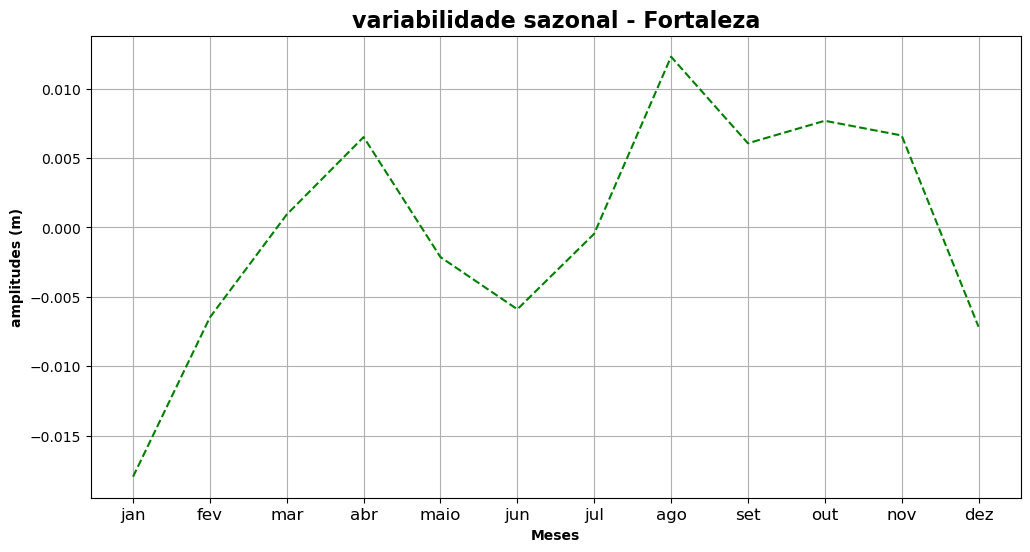

In [45]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['mes_nome'], df['media_indice_corrigido'], linestyle='--', color='g', label='Maré') 

plt.title('variabilidade sazonal - Fortaleza', fontsize=16, fontweight='bold')
plt.xlabel('Meses', fontweight='bold')
plt.ylabel('amplitudes (m)' , fontweight='bold')
plt.xticks(fontsize=12)  # Ajuste o tamanho da fonte dos rótulos no eixo x
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [ ]:
data

In [47]:
import pandas as pd

# Supondo que 'data' seja o nome do seu DataFrame
data1['Data1'] = pd.to_datetime(data1['Data1'])

# Criando a nova coluna 'anomes' no formato YYYY-MM
data1['anomes'] = data1['Data1'].dt.strftime('%Y-%m')


In [48]:
# Dicionário para mapear nome do mês para número do mês
meses = {
    'jan': 1,
    'fev': 2,
    'mar': 3,
    'abr': 4,
    'mai': 5,
    'jun': 6,
    'jul': 7,
    'ago': 8,
    'set': 9,
    'out': 10,
    'nov': 11,
    'dez': 12
}




# Mapeando o nome do mês para o número do mês usando o dicionário 'meses'
df['mes'] = df['mes_nome'].map(meses)

#ordenando os meses pra ficar bonitinho
df = df.sort_values(by='mes')

In [49]:
df

,mes_nome,media_indice_sazonal,media_indice_corrigido,mes
0,jan,-0.017521,-0.017968,1.0
1,fev,-0.006039,-0.006487,2.0
2,mar,0.001377,0.000929,3.0
3,abr,0.006958,0.006510,4.0
5,jun,-0.005454,-0.005901,6.0
6,jul,-0.000008,-0.000455,7.0
7,ago,0.012748,0.012300,8.0
8,set,0.006510,0.006063,9.0
9,out,0.008131,0.007684,10.0
10,nov,0.007073,0.006625,11.0


In [51]:
#Criando a nova coluna e adcionando a média pra cada respectivo mês do df
data1['indices_sazonais'] = data1['mensal'].map(df.set_index('mes')['media_indice_corrigido'])

KeyError: 'mensal'

In [ ]:
data

In [ ]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(data['Data1'], data['indices_sazonais'], 'g', label='Indice Sazonal')
plt.xlabel('meses')
plt.ylabel('Amplitude (m)')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
# ciclo anual
data['ciclo_anual'] = data['altura'] - tendencia - data['indices_sazonais']

In [ ]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(data['Data1'], data['ciclo_anual'], 'g', label='Ciclo Anual')
plt.xlabel('Meses')
plt.ylabel('Amplitude (m)')
plt.title('Ciclo anual')
plt.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(data['Data1'], data['Media_Movel_Centrada'], label= 'Média Móvel centrada')
plt.grid(True)
plt.xlabel('Anos', fontweight='bold')
plt.ylabel('Amplitude (m)', fontweight='bold')
plt.title('Variabilidade interanual - Fortaleza',fontsize=16, fontweight='bold')
plt.legend()
plt.show()

